In [1]:
import numpy as np
import torch
import torch.nn as nn
from torchvision import datasets
from torchvision import transforms
from torch.utils.data.sampler import SubsetRandomSampler

# Device configuration
device = torch.device('cuda:0')
batch_size = 32
device

device(type='cuda', index=0)

In [2]:
def get_train_valid_loader(data_dir,
                           batch_size,
                           augment,
                           random_seed,
                           valid_size=0.1,
                           shuffle=True):
    normalize = transforms.Normalize(
        mean=[0.4914, 0.4822, 0.4465],
        std=[0.2023, 0.1994, 0.2010],
    )

    # define transforms
    valid_transform = transforms.Compose([
        transforms.Resize((227, 227)),
        transforms.ToTensor(),
        normalize,
    ])
    if augment:
        train_transform = transforms.Compose([
            transforms.RandomCrop(32, padding=4),
            transforms.RandomHorizontalFlip(),
            transforms.ToTensor(),
            normalize,
        ])
    else:
        train_transform = transforms.Compose([
            transforms.Resize((227, 227)),
            transforms.ToTensor(),
            normalize,
        ])

    # load the dataset
    train_dataset = datasets.GTSRB(
        root=data_dir, split='train',
        download=True, transform=train_transform,
    )

    valid_dataset = datasets.GTSRB(
        root=data_dir, split='train',
        download=True, transform=valid_transform,
    )

    num_train = len(train_dataset)
    indices = list(range(num_train))
    split = int(np.floor(valid_size * num_train))

    if shuffle:
        np.random.seed(random_seed)
        np.random.shuffle(indices)

    train_idx, valid_idx = indices[split:], indices[:split]
    train_sampler = SubsetRandomSampler(train_idx)
    valid_sampler = SubsetRandomSampler(valid_idx)

    train_loader = torch.utils.data.DataLoader(
        train_dataset, batch_size=batch_size, sampler=train_sampler)

    valid_loader = torch.utils.data.DataLoader(
        valid_dataset, batch_size=batch_size, sampler=valid_sampler)

    return (train_loader, valid_loader)


def get_test_loader(data_dir,
                    batch_size,
                    shuffle=True):
    normalize = transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225],
    )

    # define transform
    transform = transforms.Compose([
        transforms.Resize((227, 227)),
        transforms.ToTensor(),
        normalize,
    ])

    dataset = datasets.GTSRB(
        root=data_dir, split='test',
        download=True, transform=transform,
    )

    data_loader = torch.utils.data.DataLoader(
        dataset, batch_size=batch_size, shuffle=shuffle
    )

    return data_loader


# CIFAR10 dataset
train_loader, valid_loader = get_train_valid_loader(data_dir='./data', batch_size=32,
                                                    augment=False, random_seed=1)

test_loader = get_test_loader(data_dir='./data',
                              batch_size=32)


  0%|          | 0/187490228 [00:00<?, ?it/s]

Extracting data/gtsrb/GTSRB-Training_fixed.zip to data/gtsrb


  0%|          | 0/88978620 [00:00<?, ?it/s]

Extracting data/gtsrb/GTSRB_Final_Test_Images.zip to data/gtsrb


  0%|          | 0/99620 [00:00<?, ?it/s]

Extracting data/gtsrb/GTSRB_Final_Test_GT.zip to data/gtsrb


In [ ]:
train_loader

In [3]:
import torchvision

model = torch.hub.load('pytorch/vision:v0.10.0', 'googlenet', pretrained=False)
#model = torchvision.models.googlenet() 
# model.to('cuda:0')
model.cuda()

Downloading: "https://github.com/pytorch/vision/zipball/v0.10.0" to /root/.cache/torch/hub/v0.10.0.zip
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)
/usr/local/lib/python3.8/dist-packages/torchvision/models/googlenet.py:47: FutureWarning: The default weight initialization of GoogleNet will be changed in future releases of torchvision. If you wish to keep the old behavior (which leads to long initialization times due to scipy/scipy#11299), please set init_weights=True.
  warnings.warn(


GoogLeNet(
  (conv1): BasicConv2d(
    (conv): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool1): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
  (conv2): BasicConv2d(
    (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (conv3): BasicConv2d(
    (conv): Conv2d(64, 192, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(192, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
  (inception3a): Inception(
    (branch1): BasicConv2d(
      (conv): Conv2d(192, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track

In [4]:
num_classes = 43
num_epochs = 30
batch_size = 32
learning_rate = 0.0001

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=0.005)

# Train the model
total_step = len(train_loader)
print(device)

cuda:0


In [5]:
import time

start_time = time.time()
total_step = len(train_loader)
accuracy_list = []
steps_list = []
loss_list = []

model.train()

for epoch in range(num_epochs):
    for i, data in enumerate(train_loader):
        images, labels = data[0].to(device), data[1].to(device)

        # output, x = model(images)
        # loss = criterion(output, labels)
        #Forward Pass
        outputs = model(images).logits
        loss = criterion(outputs, labels)

        #Backpropogation and Optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        #Train Accuracy
        total = labels.size(0)
        _, predicted = torch.max(outputs.data, 1)

        correct = (predicted == labels).sum().item()

        steps = i + 1
        if(steps%325 == 0):
          accuracy = (correct / total) * 100
          accuracy_list.append(accuracy)
          steps_list.append(steps)
          loss_list.append(loss.item())
          print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}, Accuracy: {:.2f}%'
                .format(epoch + 1, num_epochs, steps, total_step, loss.item(),
                            accuracy))
            

print("######## Training Finished in {} seconds ###########".format(time.time() - start_time))
print("Accuracy List: ", accuracy_list, "Steps List: ", steps_list)

Epoch [1/30], Step [325/750], Loss: 2.0902, Accuracy: 31.25%
Epoch [1/30], Step [650/750], Loss: 0.5229, Accuracy: 90.62%
Epoch [2/30], Step [325/750], Loss: 0.2010, Accuracy: 96.88%
Epoch [2/30], Step [650/750], Loss: 0.0817, Accuracy: 100.00%
Epoch [3/30], Step [325/750], Loss: 0.1535, Accuracy: 96.88%
Epoch [3/30], Step [650/750], Loss: 0.0344, Accuracy: 100.00%
Epoch [4/30], Step [325/750], Loss: 0.0543, Accuracy: 100.00%
Epoch [4/30], Step [650/750], Loss: 0.0605, Accuracy: 100.00%
Epoch [5/30], Step [325/750], Loss: 0.0637, Accuracy: 100.00%
Epoch [5/30], Step [650/750], Loss: 0.1287, Accuracy: 96.88%
Epoch [6/30], Step [325/750], Loss: 0.3836, Accuracy: 93.75%
Epoch [6/30], Step [650/750], Loss: 0.2394, Accuracy: 96.88%
Epoch [7/30], Step [325/750], Loss: 0.0402, Accuracy: 100.00%
Epoch [7/30], Step [650/750], Loss: 0.2178, Accuracy: 93.75%
Epoch [8/30], Step [325/750], Loss: 0.0175, Accuracy: 100.00%
Epoch [8/30], Step [650/750], Loss: 0.1487, Accuracy: 93.75%
Epoch [9/30], Ste

In [6]:
!pip install ptflops
import torchvision.models as models
import torch
from ptflops import get_model_complexity_info

with torch.cuda.device(0):
  macs, params = get_model_complexity_info(model, (3, 224, 224), as_strings=True,
                                           print_per_layer_stat=False, verbose=True)
  print('{:<30}  {:<8}'.format('Computational complexity: ', macs))
  print('{:<30}  {:<8}'.format('Number of parameters: ', params))

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for ptflops: filename=ptflops-0.6.9-py3-none-any.whl size=11712 sha256=16d1b06790124befa0efd445ff4e0dc62f71713b8922b486eb7102b6f3d28ebf
  Stored in directory: /root/.cache/pip/wheels/b6/86/d5/cf62a3571b005f91cd9accefc5e10f40214538be997198afad
Successfully built ptflops
Computational complexity:       1.51 GMac
Number of parameters:           13.0 M  


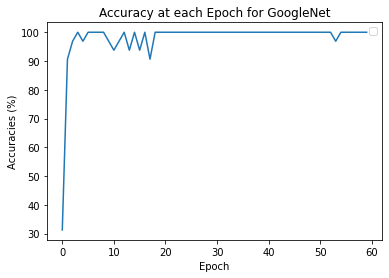

In [7]:
import matplotlib.pyplot as pyplot
import numpy as np


y_axis = np.array(accuracy_list)

pyplot.title("Accuracy at each Epoch for GoogleNet")
pyplot.ylabel("Accuracies (%)")
pyplot.xlabel("Epoch")
pyplot.plot( y_axis)

pyplot.legend()

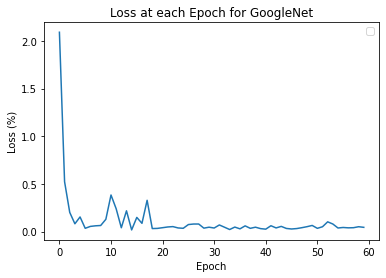

In [8]:
y_axis = np.array(loss_list)

pyplot.title("Loss at each Epoch for GoogleNet")
pyplot.ylabel("Loss (%)")
pyplot.xlabel("Epoch")
pyplot.plot( y_axis)

pyplot.legend()

In [10]:
labels_list = list(range(1,44))
labels_list
numClasses=43

In [11]:
from torch.autograd import Variable
valid_loss = []
valid_accuracy = []
import torch.nn.functional as F

pred_y = []
lable_given_img = []

def evaluate(data_loader):
    model.eval()
    loss = 0
    correct = 0
    total = 0
    for data, target in data_loader:
       
        data, target = Variable(data, volatile=True), Variable(target)
        if torch.cuda.is_available():
            data = data.cuda()
            target = target.cuda()
        
        output = model(data)

        loss += F.cross_entropy(output, target, size_average=False).item()
        pred = torch.max(output.data, 1)[1]
        #print(pred)
        total += len(data)

        for i in pred :
          pred_y.append(i.abs().tolist())
        for i in target :
          lable_given_img.append(i.abs().tolist())
        correct += (pred == target).sum()

    loss /= len(data_loader.dataset)
    valid_loss.append(loss)    
    valid_accuracy.append(100 * correct / total)
    print('\nAverage Validation loss: {:.5f}\tAccuracy: {} %'.format(loss, 100 * correct / total))
    print('correct:',correct)

evaluate(test_loader)

<ipython-input-11-1bdf26fb39f0>:16: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  data, target = Variable(data, volatile=True), Variable(target)
/usr/local/lib/python3.8/dist-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))



Average Validation loss: 0.12157	Accuracy: 97.87014770507812 %
correct: tensor(12361, device='cuda:0')


In [12]:

PATH = '/content/googleNetGTSRB.pt'
torch.save({
            'model_state_dict': model.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            'loss': loss_list,
            'accuracy': accuracy_list,
            'test_loss': valid_loss,
            'test_accuracy':valid_accuracy
            }, PATH)

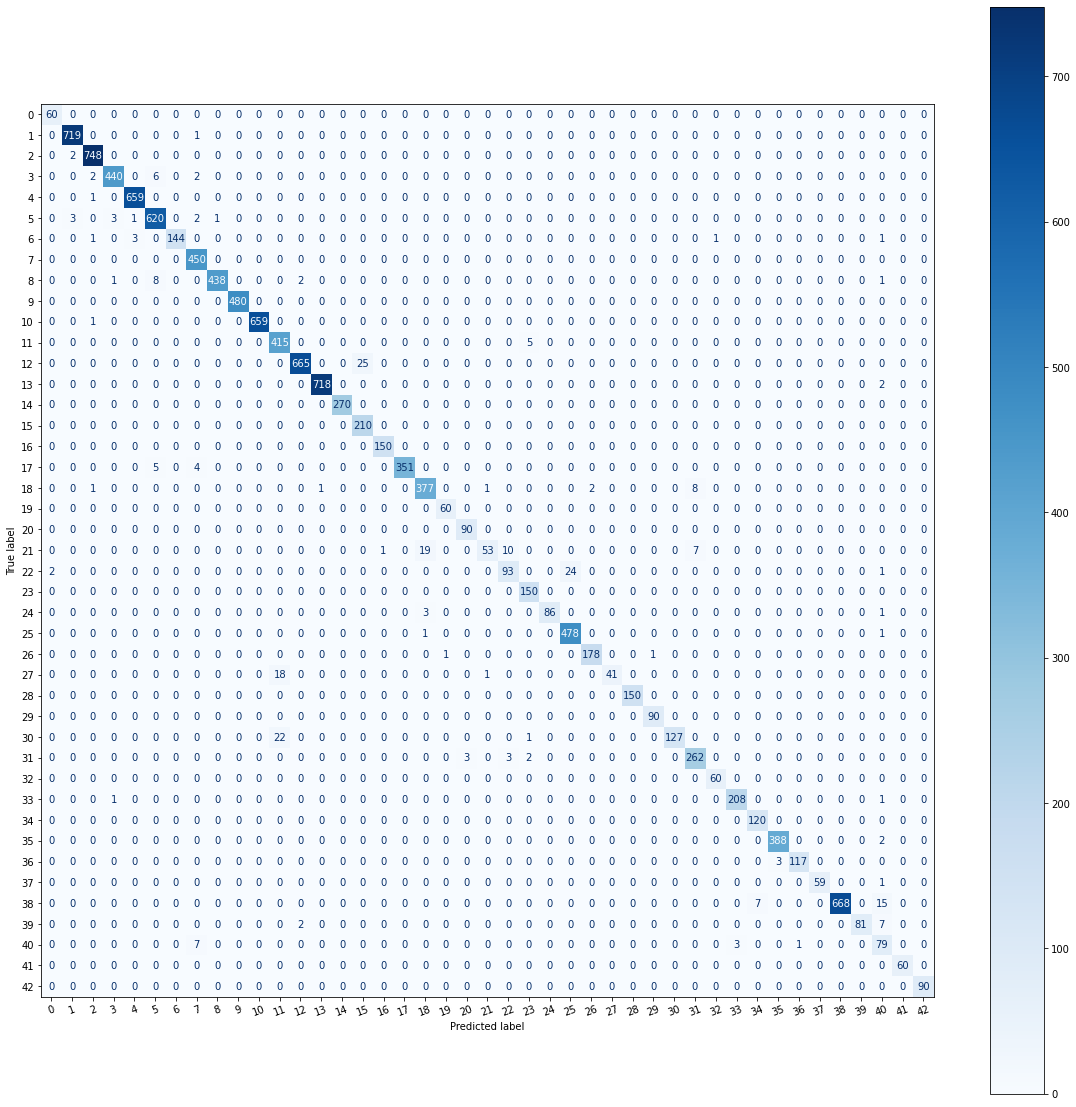

In [13]:
# Print confusion matrix
import matplotlib.pyplot as pyplot
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

def plot_confusion_matrix(labels, pred_labels, classes):
    
    fig = plt.figure(figsize = (20, 20));
    ax = fig.add_subplot(1, 1, 1);
    cm = confusion_matrix(labels, pred_labels);
    cm = ConfusionMatrixDisplay(cm, display_labels = classes);
    cm.plot(values_format = 'd', cmap = 'Blues', ax = ax)
    plt.xticks(rotation = 20)
    
labels_arr = range(0, numClasses)
plot_confusion_matrix(lable_given_img, pred_y, labels_arr)

In [14]:
from sklearn.metrics import classification_report
print(classification_report(lable_given_img, pred_y))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98        60
           1       0.99      1.00      1.00       720
           2       0.99      1.00      0.99       750
           3       0.99      0.98      0.98       450
           4       0.99      1.00      1.00       660
           5       0.97      0.98      0.98       630
           6       1.00      0.96      0.98       150
           7       0.97      1.00      0.98       450
           8       1.00      0.97      0.99       450
           9       1.00      1.00      1.00       480
          10       1.00      1.00      1.00       660
          11       0.91      0.99      0.95       420
          12       0.99      0.96      0.98       690
          13       1.00      1.00      1.00       720
          14       1.00      1.00      1.00       270
          15       0.89      1.00      0.94       210
          16       0.99      1.00      1.00       150
          17       1.00    